In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('selected-features.csv', index_col=0)
df

,A1,A8,B10,B11,B13,B9,C1,C2,C4,C5,...,O10,O2,O4,O6,O7,O8,P2,P4,P6,P7
0,1,4,2,1,1,1,4,5,4,2,...,4,2,4,2,2,4,5,4,5,1
1,4,4,2,4,1,3,1,2,3,2,...,4,2,2,2,2,3,4,2,2,3
2,3,3,2,2,2,2,2,4,3,3,...,3,2,3,2,3,4,3,2,2,2
3,4,2,3,3,4,3,3,2,4,3,...,4,2,2,4,5,4,2,2,4,2
4,4,1,1,5,2,4,2,4,3,4,...,4,3,3,2,1,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
49155,4,3,3,2,5,5,3,4,3,2,...,3,3,3,4,3,3,3,4,3,3
49156,2,4,4,4,2,4,2,4,4,4,...,4,3,3,2,2,2,2,4,2,3
49157,4,4,2,1,2,1,4,5,3,3,...,2,3,2,4,4,5,2,3,2,2


In [3]:
b = (df == 0).any(axis=1)
null_indexes = b[b==True].index
df = df.drop(index=null_indexes)
df

,A1,A8,B10,B11,B13,B9,C1,C2,C4,C5,...,O10,O2,O4,O6,O7,O8,P2,P4,P6,P7
0,1,4,2,1,1,1,4,5,4,2,...,4,2,4,2,2,4,5,4,5,1
1,4,4,2,4,1,3,1,2,3,2,...,4,2,2,2,2,3,4,2,2,3
2,3,3,2,2,2,2,2,4,3,3,...,3,2,3,2,3,4,3,2,2,2
3,4,2,3,3,4,3,3,2,4,3,...,4,2,2,4,5,4,2,2,4,2
4,4,1,1,5,2,4,2,4,3,4,...,4,3,3,2,1,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49152,4,2,4,3,2,4,2,4,4,4,...,4,2,2,3,4,3,2,3,3,2
49153,4,3,2,3,1,2,4,5,2,2,...,2,5,4,3,3,1,2,3,3,2
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
49156,2,4,4,4,2,4,2,4,4,4,...,4,3,3,2,2,2,2,4,2,3


In [4]:
b = df.std(axis=1) < 0.01
df = df.drop(index=b[b].index)
df

,A1,A8,B10,B11,B13,B9,C1,C2,C4,C5,...,O10,O2,O4,O6,O7,O8,P2,P4,P6,P7
0,1,4,2,1,1,1,4,5,4,2,...,4,2,4,2,2,4,5,4,5,1
1,4,4,2,4,1,3,1,2,3,2,...,4,2,2,2,2,3,4,2,2,3
2,3,3,2,2,2,2,2,4,3,3,...,3,2,3,2,3,4,3,2,2,2
3,4,2,3,3,4,3,3,2,4,3,...,4,2,2,4,5,4,2,2,4,2
4,4,1,1,5,2,4,2,4,3,4,...,4,3,3,2,1,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49150,2,4,2,3,2,3,3,4,5,3,...,4,4,4,1,3,2,2,4,2,2
49152,4,2,4,3,2,4,2,4,4,4,...,4,2,2,3,4,3,2,3,3,2
49153,4,3,2,3,1,2,4,5,2,2,...,2,5,4,3,3,1,2,3,3,2
49156,2,4,4,4,2,4,2,4,4,4,...,4,3,3,2,2,2,2,4,2,3


In [5]:
print("min:",df.min().min())
print("max:",df.max().max())

min: 1
max: 5


In [6]:
df.shape[0]

41310

In [7]:
df_ = df - 3
X_Norm = preprocessing.normalize(df_, axis=1)
pd.DataFrame(X_Norm).head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.169638,0.084819,-0.084819,-0.169638,-0.169638,-0.169638,0.084819,0.169638,0.084819,-0.084819,...,0.084819,-0.084819,0.084819,-0.084819,-0.084819,0.084819,0.169638,0.084819,0.169638,-0.169638
1,0.095346,0.095346,-0.095346,0.095346,-0.190693,0.000000,-0.190693,-0.095346,0.000000,-0.095346,...,0.095346,-0.095346,-0.095346,-0.095346,-0.095346,0.000000,0.095346,-0.095346,-0.095346,0.000000
2,0.000000,0.000000,-0.113961,-0.113961,-0.113961,-0.113961,-0.113961,0.113961,0.000000,0.000000,...,0.000000,-0.113961,0.000000,-0.113961,0.000000,0.113961,0.000000,-0.113961,-0.113961,-0.113961
3,0.108465,-0.108465,0.000000,0.000000,0.108465,0.000000,0.000000,-0.108465,0.108465,0.000000,...,0.108465,-0.108465,-0.108465,0.108465,0.216930,0.108465,-0.108465,-0.108465,0.108465,-0.108465
4,0.102598,-0.205196,-0.205196,0.205196,-0.102598,0.102598,-0.102598,0.102598,0.000000,0.102598,...,0.102598,0.000000,0.000000,-0.102598,-0.205196,-0.102598,0.000000,0.000000,0.000000,0.102598


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.07924543914131178
For n_clusters = 4 The average silhouette_score is : 0.0486428500375685
For n_clusters = 6 The average silhouette_score is : 0.043157147790931986
For n_clusters = 8 The average silhouette_score is : 0.03327757923282274
For n_clusters = 10 The average silhouette_score is : 0.030304345040011813


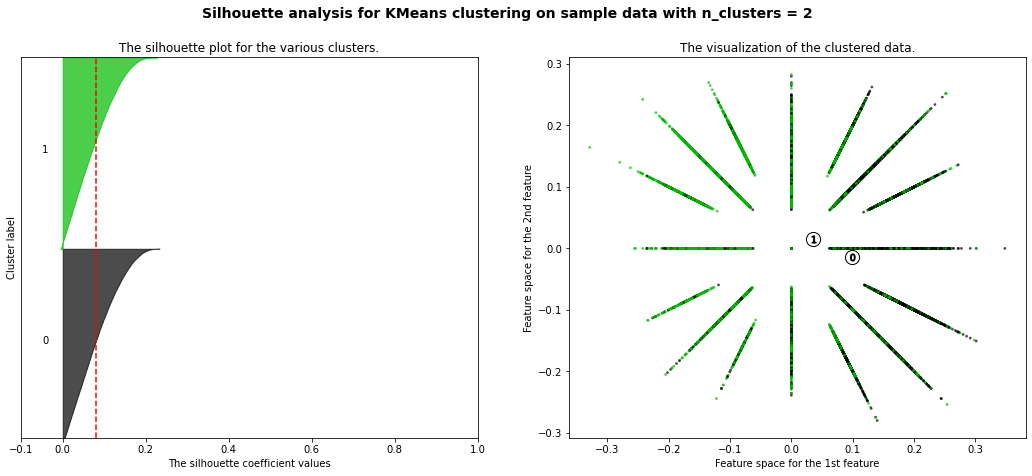

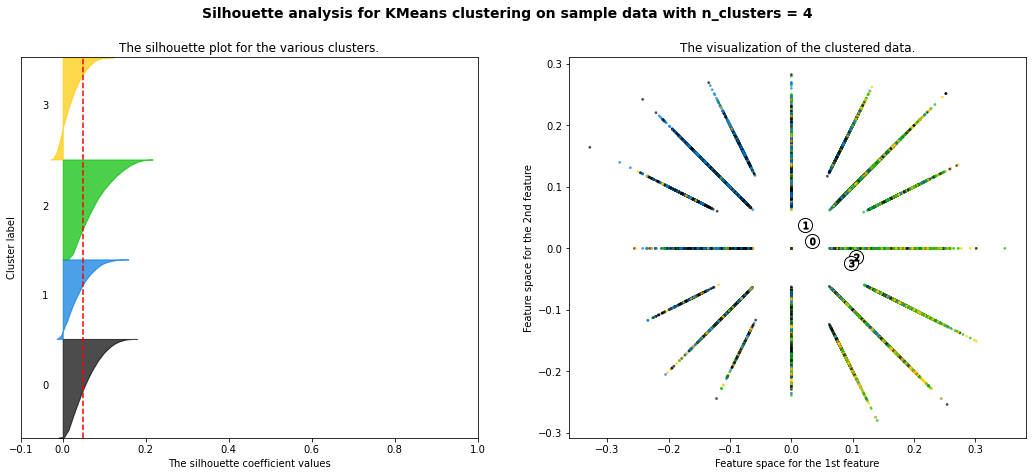

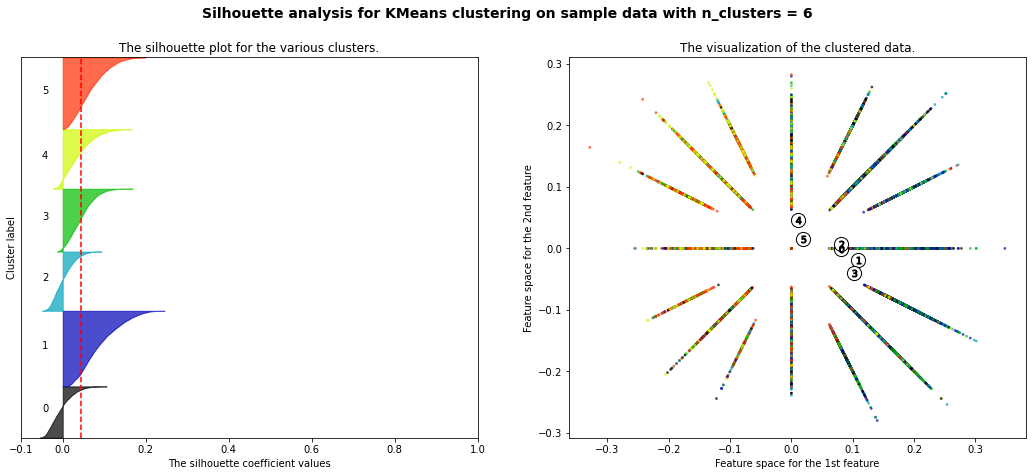

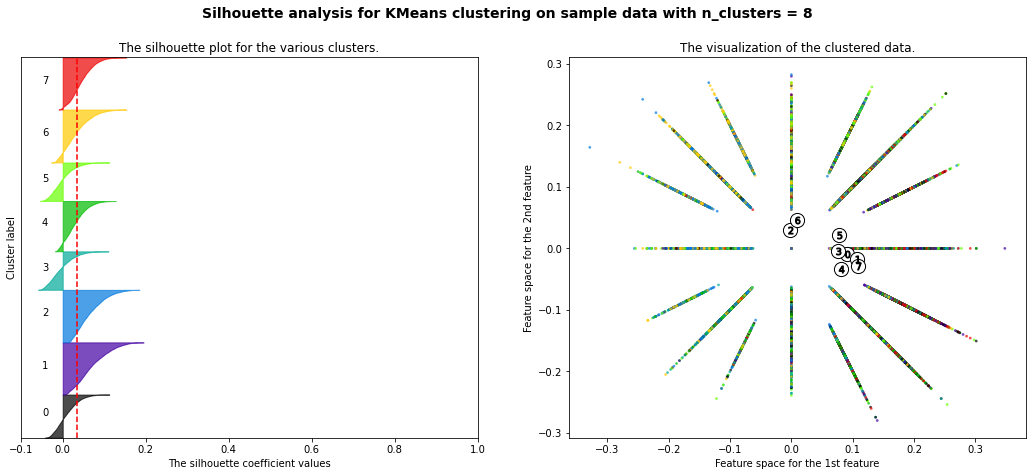

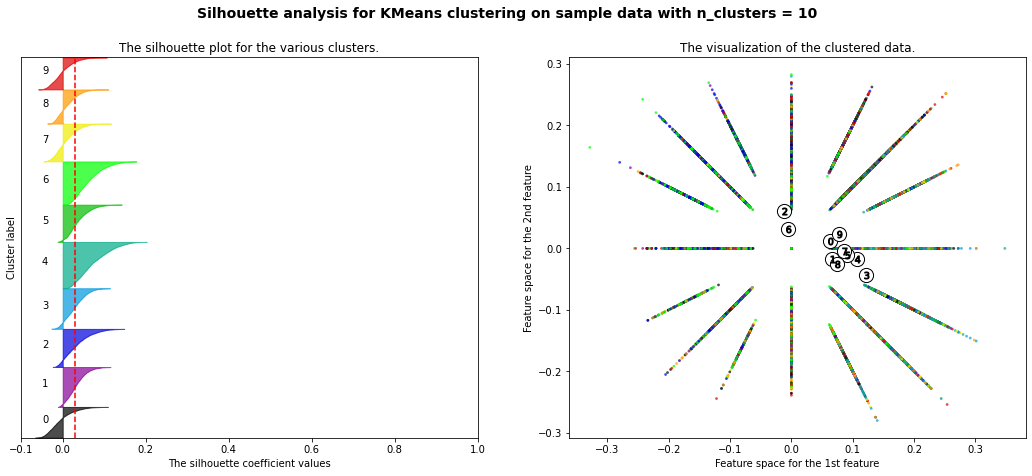

In [8]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = X_Norm

range_n_clusters = [2*i for i in range(1,6)]
sse = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=1000)
    cluster_labels = clusterer.fit_predict(X)
    sse.append(clusterer.inertia_)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

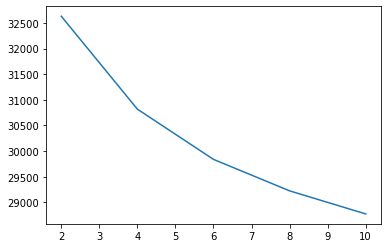

In [9]:
plt.plot(range_n_clusters, sse)

In [11]:
from numpy.linalg import norm

g = 8

max_ = -1
arg_max = 0
min_ = 1
arg_min = 0


a = X_Norm[clusterer.predict(X_Norm) == g][1]
print(a)
for b in X_Norm[clusterer.predict(X_Norm) == g]:
    if a is b:
        continue
    cos_ = a.dot(b)
    if cos_ < min_:
        min_ = cos_
        arg_min = b
    if cos_ > max_:
        max_ = cos_
        arg_max = b
        
print(min_)
print(max_)

[ 0.125  0.    -0.125 -0.25  -0.125  0.125  0.     0.     0.    -0.125
  0.    -0.125 -0.125  0.125  0.125  0.125 -0.125  0.125  0.125  0.125
  0.125  0.25   0.125  0.    -0.125  0.     0.125  0.     0.     0.
  0.125  0.125 -0.125  0.125  0.25   0.125  0.125  0.125 -0.125  0.125
  0.125 -0.125  0.     0.     0.     0.     0.125  0.125  0.     0.
  0.25   0.     0.     0.125 -0.125  0.     0.125  0.125 -0.125 -0.125
 -0.125  0.25   0.     0.     0.125 -0.125  0.     0.125  0.     0.
  0.125  0.    -0.125  0.125  0.   ]
-0.21577367083828145
1.0


In [12]:
n = len(clusterer.cluster_centers_)
m = np.zeros(shape=(n, n))

for i, c1 in enumerate(clusterer.cluster_centers_):
    for j, c2 in enumerate(clusterer.cluster_centers_):
        
        if norm(c1) != 0:
            c1 /= norm(c1)
        if norm(c2) != 0:
            c2 /= norm(c2)
        m[i,j] = c1.dot(c2)
        
pd.DataFrame(m).apply(lambda x : round(x,2))

,0,1,2,3,4,5,6,7,8,9
0,1.00,0.29,0.27,0.59,0.45,0.55,-0.05,0.18,0.33,0.39
1,0.29,1.00,0.64,0.57,0.10,0.64,0.70,0.53,0.71,0.47
2,0.27,0.64,1.00,0.10,0.20,0.56,0.62,0.50,0.12,0.41
3,0.59,0.57,0.10,1.00,0.66,0.74,0.01,0.55,0.59,0.54
4,0.45,0.10,0.20,0.66,1.00,0.71,-0.32,0.54,-0.09,0.34
5,0.55,0.64,0.56,0.74,0.71,1.00,0.03,0.44,0.19,0.40
6,-0.05,0.70,0.62,0.01,-0.32,0.03,1.00,0.51,0.63,0.41
7,0.18,0.53,0.50,0.55,0.54,0.44,0.51,1.00,0.47,0.62
8,0.33,0.71,0.12,0.59,-0.09,0.19,0.63,0.47,1.00,0.52
9,0.39,0.47,0.41,0.54,0.34,0.40,0.41,0.62,0.52,1.00


In [13]:
max_ = -1
arg_max = 0
min_ = 1
arg_min = 0


for i in range(0,300):
    a = df_.iloc[i,:].values
    a = a / np.linalg.norm(a)
    for j in range(0,300):
        if j == i:
            continue
        b = df_.iloc[j,:].values
        b = b / np.linalg.norm(b)
        cos_ = a.dot(b)
        if cos_ < min_:
            min_ = cos_
            arg_min = (i,j)
        if cos_ > max_:
            max_ = cos_
            arg_max = (i,j)
    print(i, end='\r')

print(arg_min, min_)
print(arg_max, max_)


(121, 227) -0.6147702486194501
(191, 199) 0.8956037224108794


In [14]:
clusterer.predict(df_.iloc[190:200,:].values)

array([5, 4, 2, 1, 1, 6, 3, 8, 4, 4])

In [17]:
warmth = df_.columns[0:2].values.tolist()
reasoning = df_.columns[2:6].values.tolist()
emot_stab = df_.columns[6:11].values.tolist()
dominance = df_.columns[11:12].values.tolist()
liveliness = df_.columns[12:16].values.tolist()
rule_consc = df_.columns[16:22].values.tolist()
social_boldness = df_.columns[22:26].values.tolist()
sensitivity = df_.columns[26:33].values.tolist()
vigilance = df_.columns[33:37].values.tolist()
abstractedness = df_.columns[37:41].values.tolist()
privateness = df_.columns[41:47].values.tolist()
apprehension = df_.columns[47:56].values.tolist()
openness = df_.columns[56:59].values.tolist()
self_reliance = df_.columns[59:65].values.tolist()
perfectionism = df_.columns[65:71].values.tolist()
tension = df_.columns[71:].values.tolist()

features = [warmth, reasoning, emot_stab, dominance, 
           liveliness, rule_consc, social_boldness,
           sensitivity, vigilance, abstractedness,
           privateness, apprehension, openness,
           self_reliance, perfectionism, tension]

features_label = ['warmth', 'reasoning', 'emot_stab', 'dominance', 
           'liveliness', 'rule_consc', 'social_boldness',
           'sensitivity', 'vigilance', 'abstractedness',
           'privateness', 'apprehension', 'openness',
           'self_reliance', 'perfectionism', 'tension']


features

[['A1', 'A8'],
 ['B10', 'B11', 'B13', 'B9'],
 ['C1', 'C2', 'C4', 'C5', 'C9'],
 ['D10'],
 ['E10', 'E4', 'E6', 'E8'],
 ['F1', 'F3', 'F4', 'F5', 'F7', 'F8'],
 ['G3', 'G7', 'G8', 'G9'],
 ['H10', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8'],
 ['I1', 'I2', 'I4', 'I5'],
 ['J1', 'J10', 'J2', 'J3'],
 ['K1', 'K10', 'K2', 'K4', 'K8', 'K9'],
 ['L1', 'L10', 'L2', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'],
 ['M1', 'M5', 'M7'],
 ['N1', 'N10', 'N2', 'N5', 'N6', 'N9'],
 ['O10', 'O2', 'O4', 'O6', 'O7', 'O8'],
 ['P2', 'P4', 'P6', 'P7']]

In [18]:
negative = ['A8','B10','B11','B9', 'B13', 'C9', 'D10',
            'E8', 'E10', 'F7', 'F8', 'G7', 'G8',
            'G9', 'H7', 'H8', 'H10', 'J10', 'K10',
            'K8', 'K9', 'L8', 'L9', 'L10', 'M7',
            'N10', 'N9', 'O6', 'O7', 'O8', 'O10']

display(df_[negative].head())
df_n = df_.copy()
df_n[negative] = - df_[negative]
display(df_n[negative].head())


,A8,B10,B11,B9,B13,C9,D10,E8,E10,F7,...,L8,L9,L10,M7,N10,N9,O6,O7,O8,O10
0,1,-1,-2,-2,-2,0,0,0,1,0,...,1,-1,1,-2,0,1,-1,-1,1,1
1,1,-1,1,0,-2,0,-2,1,-2,1,...,-1,-1,0,-2,-2,1,-1,-1,0,1
2,0,-1,-1,-1,-1,0,0,1,1,0,...,0,0,1,-2,-2,1,-1,0,1,0
3,-1,0,0,0,1,0,0,0,-1,0,...,1,0,-1,1,0,0,1,2,1,1
4,-2,-2,2,1,-1,0,0,2,0,1,...,-2,0,0,-1,-1,1,-1,-2,-1,1


,A8,B10,B11,B9,B13,C9,D10,E8,E10,F7,...,L8,L9,L10,M7,N10,N9,O6,O7,O8,O10
0,-1,1,2,2,2,0,0,0,-1,0,...,-1,1,-1,2,0,-1,1,1,-1,-1
1,-1,1,-1,0,2,0,2,-1,2,-1,...,1,1,0,2,2,-1,1,1,0,-1
2,0,1,1,1,1,0,0,-1,-1,0,...,0,0,-1,2,2,-1,1,0,-1,0
3,1,0,0,0,-1,0,0,0,1,0,...,-1,0,1,-1,0,0,-1,-2,-1,-1
4,2,2,-2,-1,1,0,0,-2,0,-1,...,2,0,0,1,1,-1,1,2,1,-1


In [19]:
dim_df = pd.DataFrame()

for i, l in enumerate(features_label):
    dim_df[l] = df_[features[i]].sum(axis=1) / df_[features[i]].shape[1]

display(df_.head())
display(dim_df.head())

,A1,A8,B10,B11,B13,B9,C1,C2,C4,C5,...,O10,O2,O4,O6,O7,O8,P2,P4,P6,P7
0,-2,1,-1,-2,-2,-2,1,2,1,-1,...,1,-1,1,-1,-1,1,2,1,2,-2
1,1,1,-1,1,-2,0,-2,-1,0,-1,...,1,-1,-1,-1,-1,0,1,-1,-1,0
2,0,0,-1,-1,-1,-1,-1,1,0,0,...,0,-1,0,-1,0,1,0,-1,-1,-1
3,1,-1,0,0,1,0,0,-1,1,0,...,1,-1,-1,1,2,1,-1,-1,1,-1
4,1,-2,-2,2,-1,1,-1,1,0,1,...,1,0,0,-1,-2,-1,0,0,0,1


,warmth,reasoning,emot_stab,dominance,liveliness,rule_consc,social_boldness,sensitivity,vigilance,abstractedness,privateness,apprehension,openness,self_reliance,perfectionism,tension
0,-0.5,-1.75,0.6,0.0,0.75,-0.166667,0.25,0.142857,0.50,1.00,0.500000,0.555556,0.333333,1.000000,0.000000,0.75
1,1.0,-0.50,-0.8,-2.0,-1.00,0.666667,-0.50,0.000000,0.75,1.00,0.333333,-0.222222,-0.666667,0.500000,-0.500000,-0.25
2,0.0,-1.00,0.0,0.0,-0.25,-0.666667,0.00,-0.285714,0.50,0.25,0.333333,0.444444,-0.333333,0.666667,-0.166667,-0.75
3,0.0,0.25,0.0,0.0,-0.50,-0.166667,0.00,-0.714286,-0.25,1.00,0.000000,0.222222,0.333333,1.166667,0.500000,-0.50
4,-0.5,0.00,0.2,0.0,-0.25,1.000000,-1.00,-0.285714,0.00,-0.25,0.333333,0.222222,0.000000,0.500000,-0.500000,0.25


In [20]:
df_[['A1', 'A8']].shape[1]

2

In [21]:
X_Norm = preprocessing.normalize(dim_df, axis=1)
pd.DataFrame(X_Norm).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.178709,-0.625481,0.214451,0.000000,0.268063,-0.059570,0.089354,0.051060,0.178709,0.357418,0.178709,0.198565,0.119139,0.357418,0.000000,0.268063
1,0.311371,-0.155686,-0.249097,-0.622742,-0.311371,0.207581,-0.155686,0.000000,0.233528,0.311371,0.103790,-0.069194,-0.207581,0.155686,-0.155686,-0.077843
2,0.000000,-0.545906,0.000000,0.000000,-0.136477,-0.363937,0.000000,-0.155973,0.272953,0.136477,0.181969,0.242625,-0.181969,0.363937,-0.090984,-0.409430
3,0.000000,0.126035,0.000000,0.000000,-0.252070,-0.084023,0.000000,-0.360099,-0.126035,0.504139,0.000000,0.112031,0.168046,0.588162,0.252070,-0.252070
4,-0.278655,0.000000,0.111462,0.000000,-0.139328,0.557311,-0.557311,-0.159232,0.000000,-0.139328,0.185770,0.123847,0.000000,0.278655,-0.278655,0.139328


Automatically created module for IPython interactive environment
For n_clusters = 4 The average silhouette_score is : 0.10913058814886532
For n_clusters = 7 The average silhouette_score is : 0.0747903794837977
For n_clusters = 10 The average silhouette_score is : 0.06737170107989762
For n_clusters = 13 The average silhouette_score is : 0.06028635891821272
For n_clusters = 16 The average silhouette_score is : 0.05519656370029641
For n_clusters = 19 The average silhouette_score is : 0.05240476968112752
For n_clusters = 22 The average silhouette_score is : 0.05007053113576684
For n_clusters = 25 The average silhouette_score is : 0.0482639048345437
For n_clusters = 28 The average silhouette_score is : 0.046929159342459496


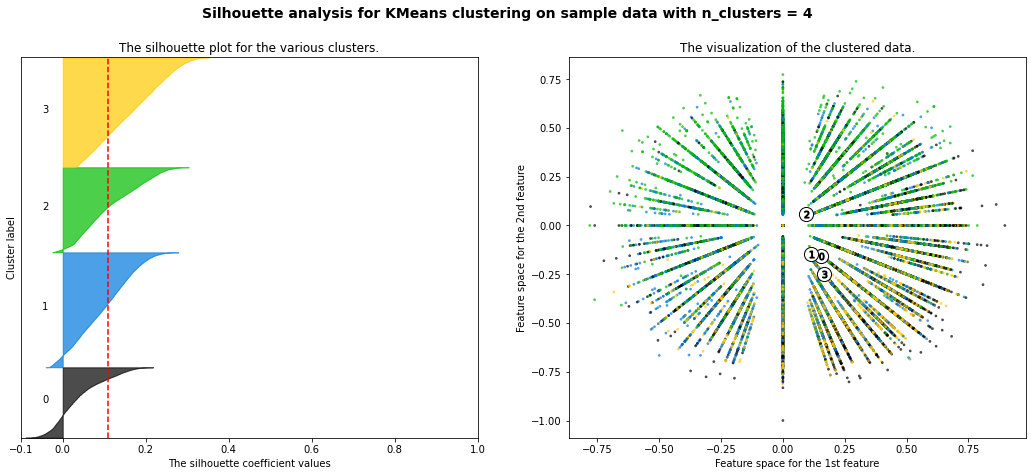

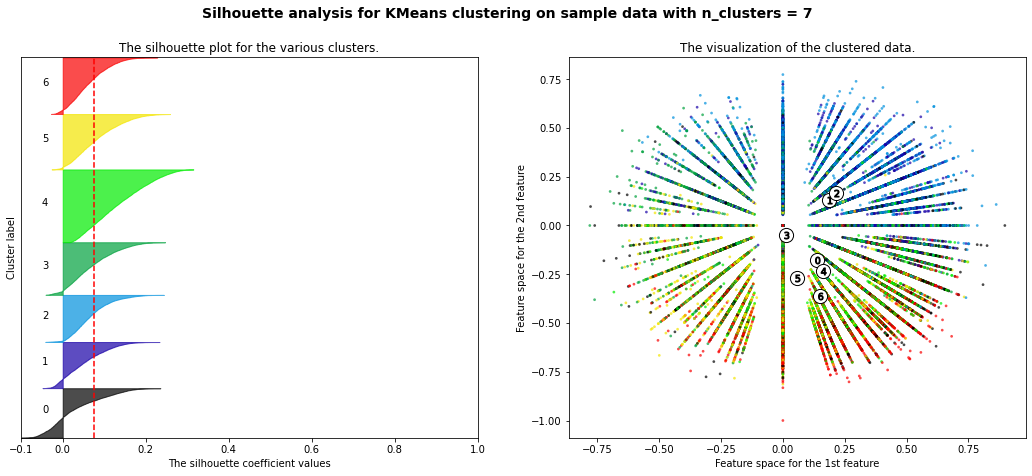

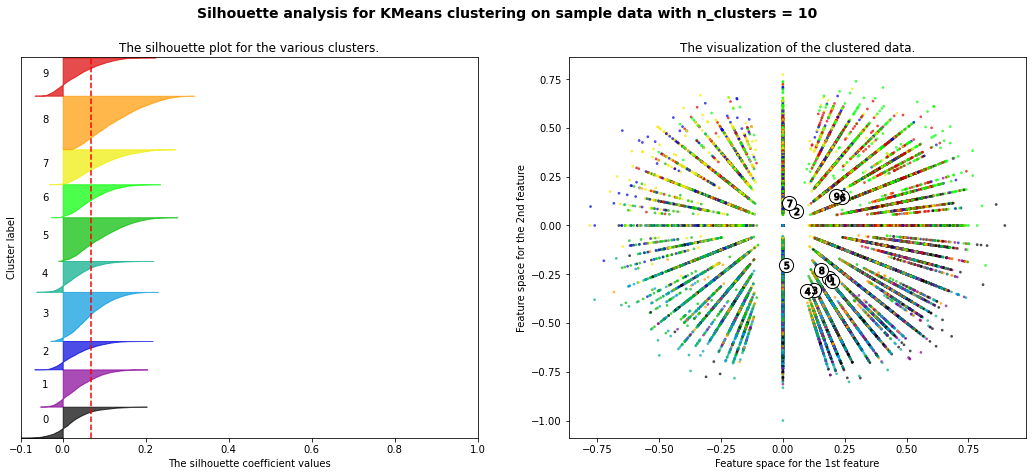

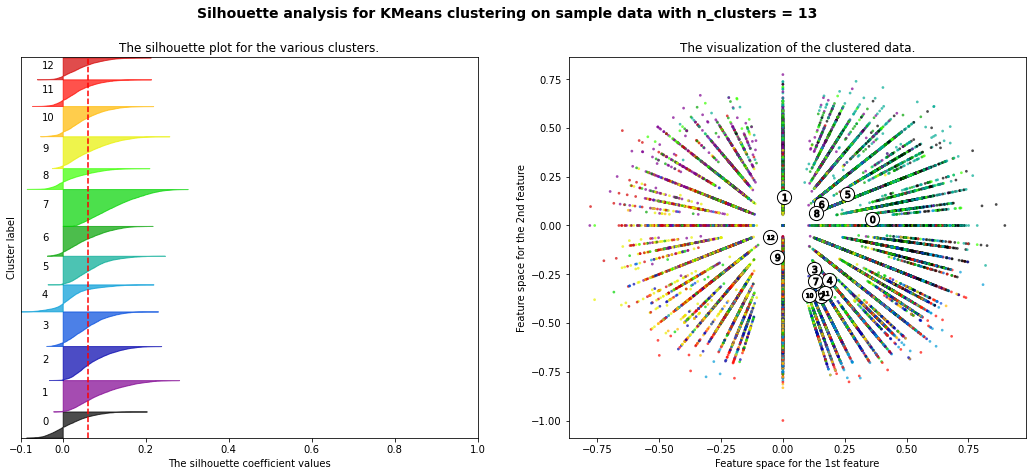

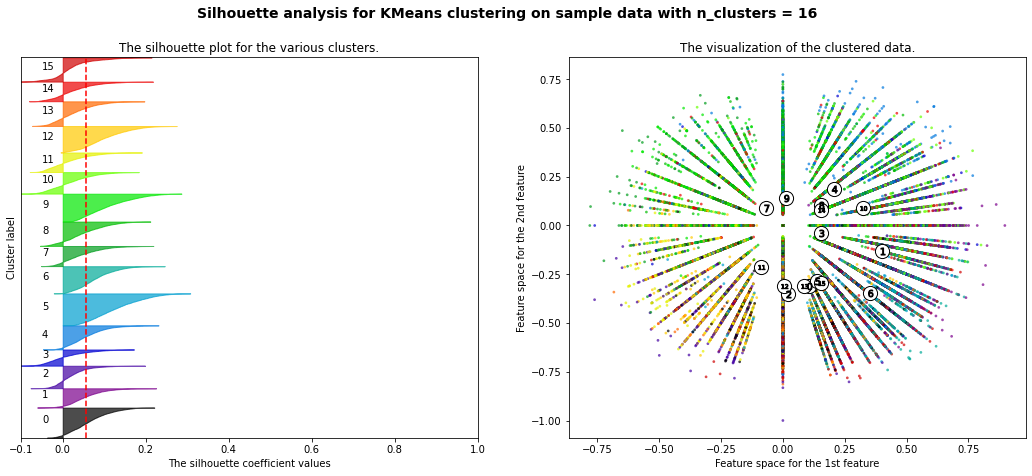

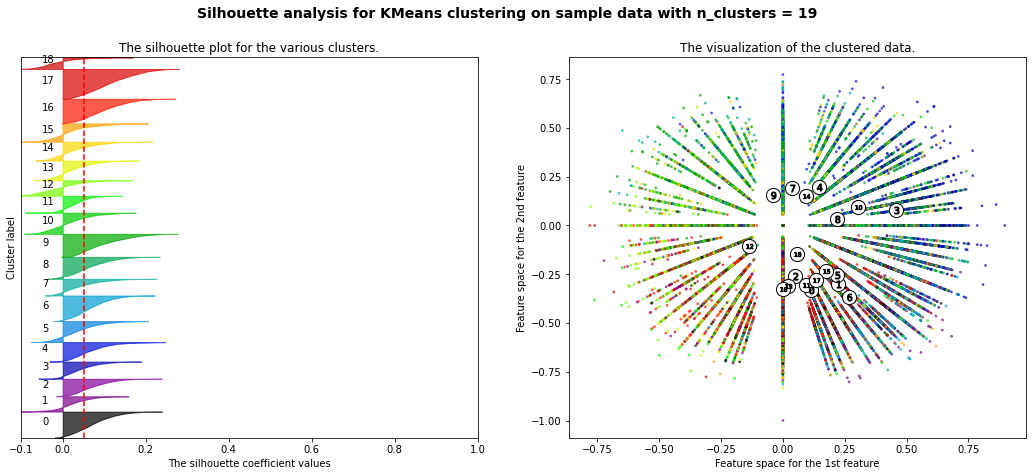

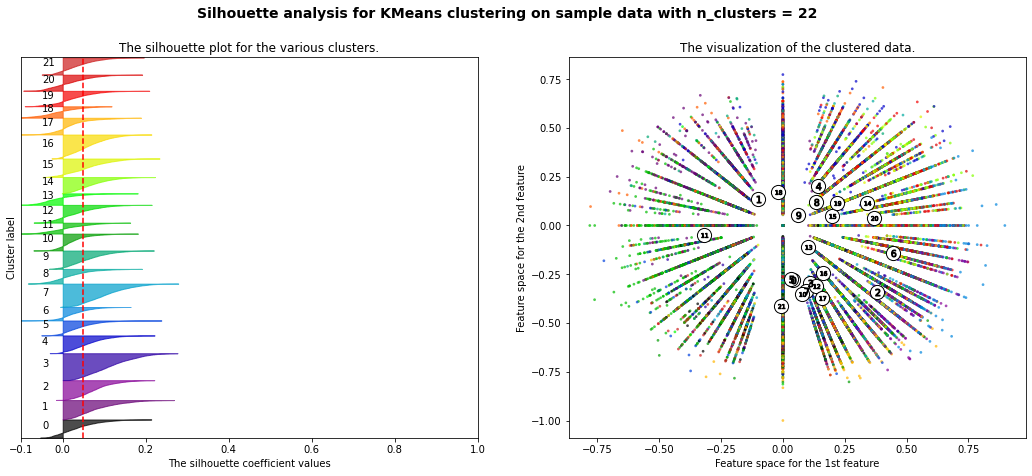

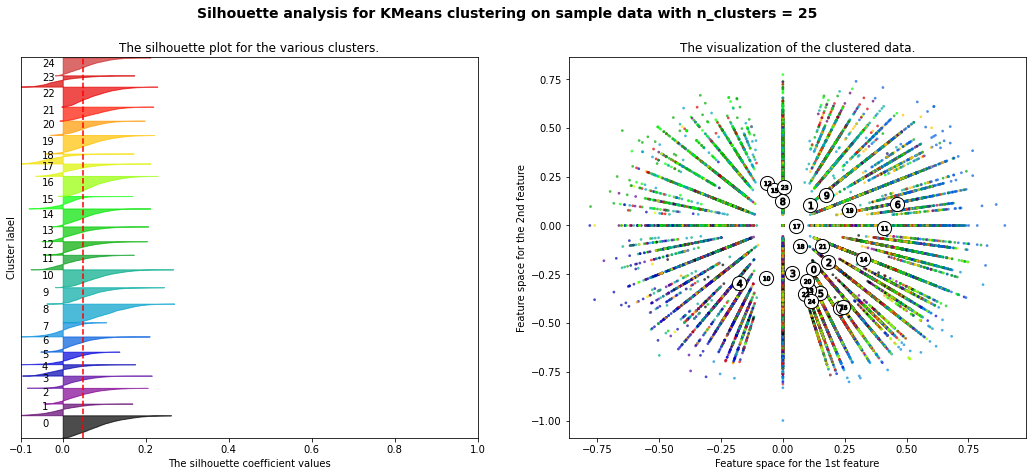

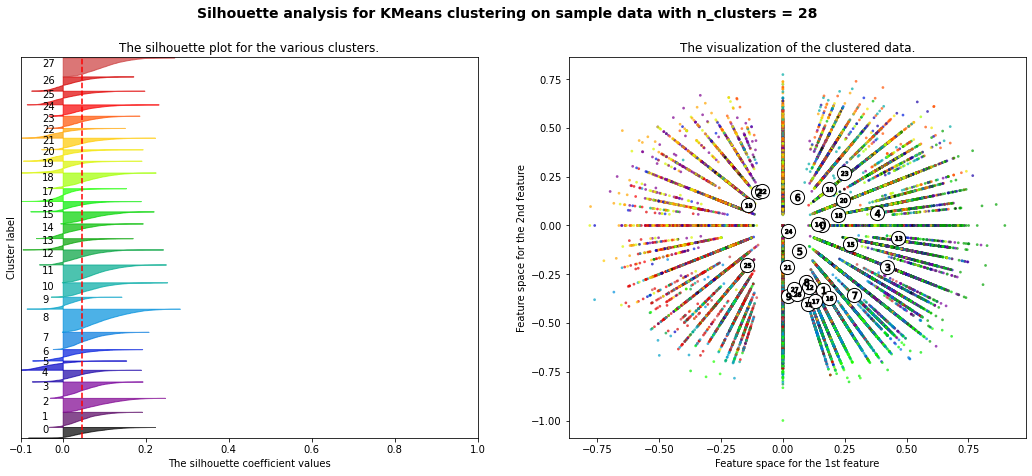

In [22]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = X_Norm

range_n_clusters = [3*i+1 for i in range(1,10)]
sse = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=1000)
    cluster_labels = clusterer.fit_predict(X)
    sse.append(clusterer.inertia_)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

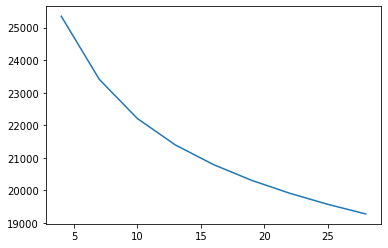

In [23]:
plt.plot(range_n_clusters, sse)

In [24]:
clusterer = KMeans(n_clusters=10, random_state=10, max_iter=1000)
clusterer.fit(X)

KMeans(max_iter=1000, n_clusters=10, random_state=10)

In [25]:
clusterer.predict([X[123], X[274]])

array([1, 6])

In [26]:
max_ = -1
arg_max = 0
min_ = 1
arg_min = 0


for i in range(0,300):
    a = X[i]
    a = a / np.linalg.norm(a)
    for j in range(0,300):
        if j == i:
            continue
        b = X[j]
        b = b / np.linalg.norm(b)
        cos_ = a.dot(b)
        if cos_ < min_:
            min_ = cos_
            arg_min = (i,j)
        if cos_ > max_:
            max_ = cos_
            arg_max = (i,j)
    print(i, end='\r')

print(arg_min, min_)
print(arg_max, max_)


(123, 274) -0.8695445045559627
(132, 137) 0.9467620447444882


In [29]:
import pickle

binary_file = open('pickled_clusterer.bin', mode='wb')
pickle.dump(clusterer, binary_file)
binary_file.close()

In [28]:
df_.columns

Index(['A1', 'A8', 'B10', 'B11', 'B13', 'B9', 'C1', 'C2', 'C4', 'C5', 'C9',
       'D10', 'E10', 'E4', 'E6', 'E8', 'F1', 'F3', 'F4', 'F5', 'F7', 'F8',
       'G3', 'G7', 'G8', 'G9', 'H10', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'I1',
       'I2', 'I4', 'I5', 'J1', 'J10', 'J2', 'J3', 'K1', 'K10', 'K2', 'K4',
       'K8', 'K9', 'L1', 'L10', 'L2', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'M1',
       'M5', 'M7', 'N1', 'N10', 'N2', 'N5', 'N6', 'N9', 'O10', 'O2', 'O4',
       'O6', 'O7', 'O8', 'P2', 'P4', 'P6', 'P7'],
      dtype='object')